# **Capstone Project: Capstone - End to End Machine Learning**

## **Regression - Yes Bank Stock Closing Price Prediction**

Project Type - Regression

Contribution - Individual

# **Project Summary**

Business Context

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

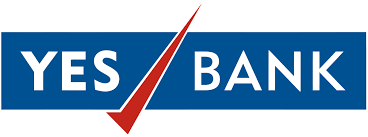

### **Video Link -**

### **GitHub Link -**

### **Objective**
The primary goal of this project is to develop a predictive model for forecasting the monthly closing stock prices of Yes Bank. By leveraging historical stock data, we aim to:


1.   **Identify Key Influences**: Determine the main factors that impact stock prices.
2.   **Model Development and Comparison**: Build and assess various regression models to forecast future stock prices accurately.
3.   **Insights and Recommendations**: Provide actionable insights and recommendations to investors and financial analysts to facilitate informed decision-making.


**Methodology**

*   *Efficient EDA*
*   *Understanding of how to prep the data and make it ready for training.*
*   *Understanding the target feature and its distribution*
*   *Assessing target features for class imbalance.*
*   *Modeling - which algorithm to use?*
*   *Evaluation while keeping class imbalance in mind.*
*   *Feature Importance and Conclusion*
*   *Understanding how your project is useful to stakeholders*


By following this structured approach, we aim to build a robust and reliable predictive model for Yes Bank's stock closing prices, providing valuable insights and aiding stakeholders in making informed financial decisions.


# ***Let's Begin!!!***

**Know your data**

**Data Description:**

**Fields  - Description**



*   Date - Date of record
*   open - Opening price
*   High - Highest price in the day
*   Low -  Lowest price in the day
*   Close - Closing price


Project Architecture:

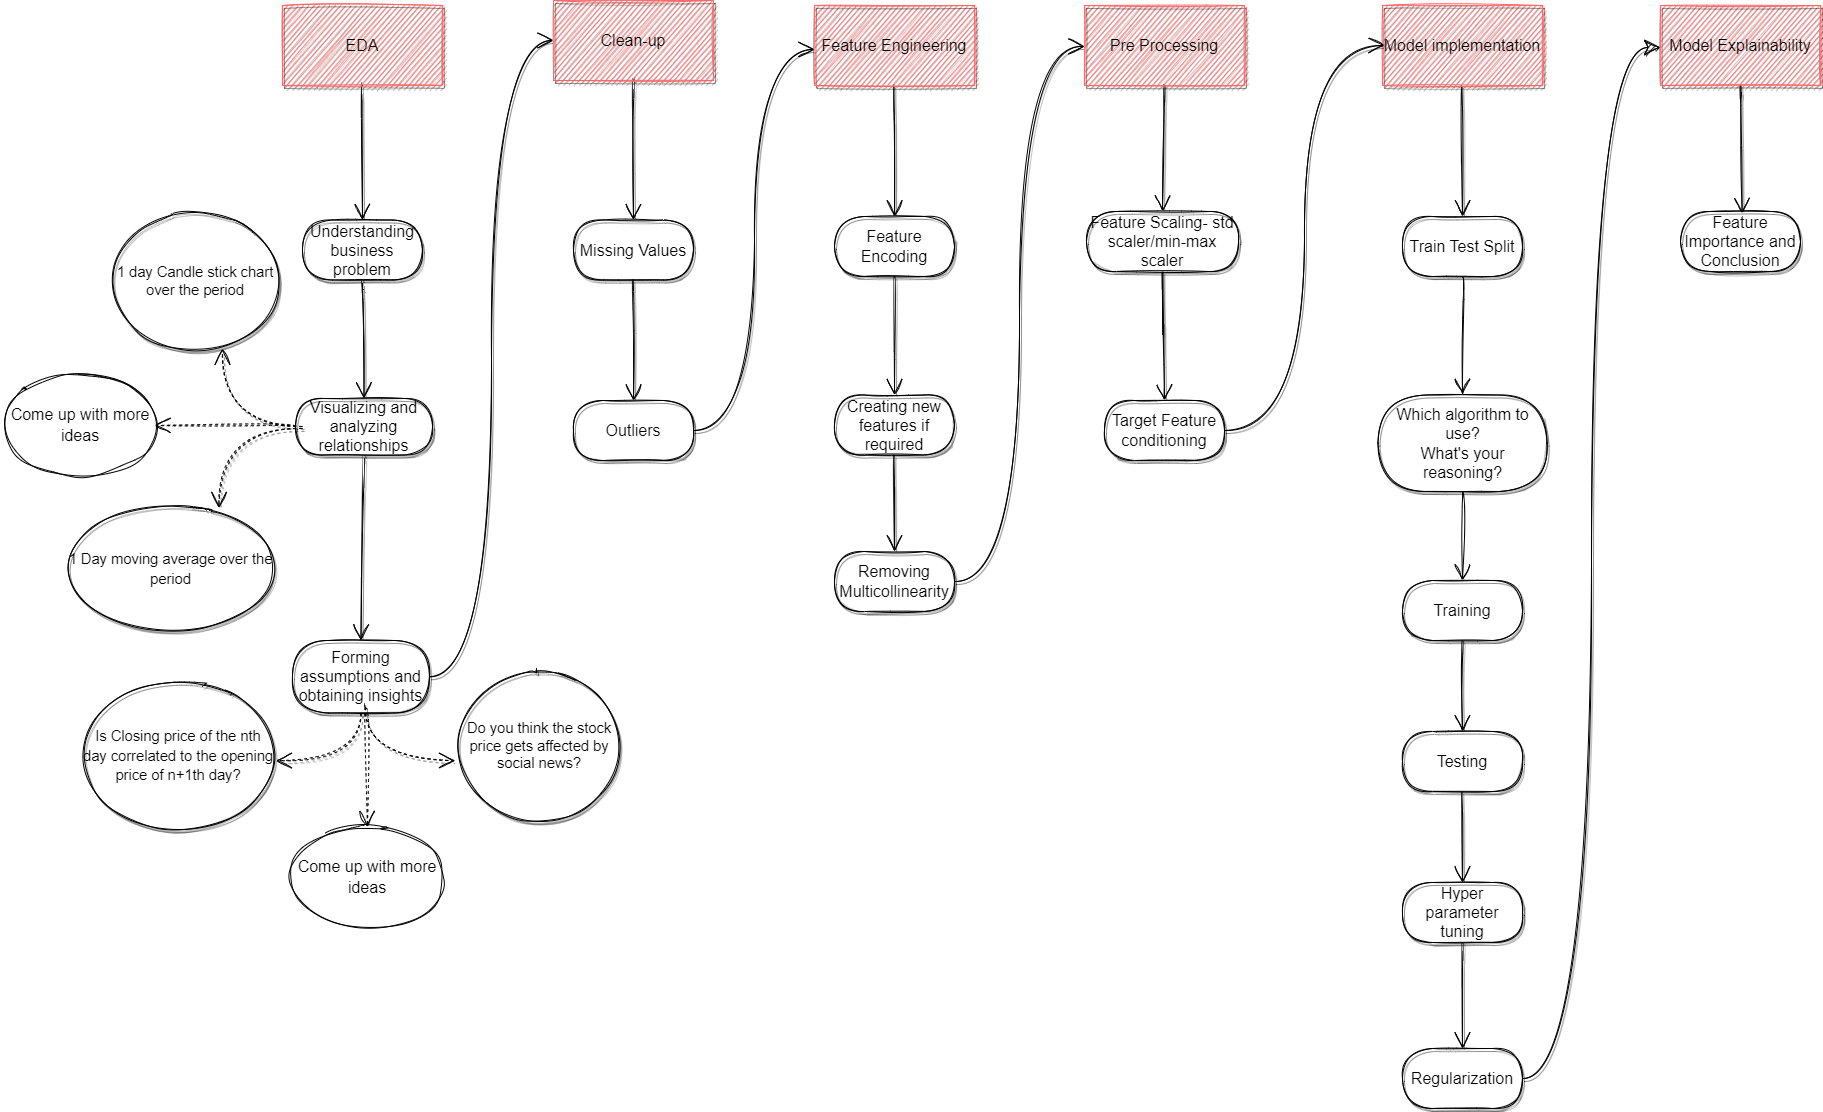

**Let's import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath="/content/data_YesBank_StockPrices.csv"
df=pd.read_csv(filepath)

Mounted at /content/drive


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:

df.shape

(185, 5)

There are 185 records

***Understanding Your Variables***

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB



**Variables Description**

There are 5 variable in data as follows

**Independent Variable**

Date : It has Month and Year.

Open : Opening stock price for respective Month.

High : Highest sotck price for respective Month.

Low : Lowest stock price for respective Month.

**Dependent Variable**

Close : Closing price of Stock for respective Month

We've the basic details about the data now let's move on to the next step that's EDA

### **Exploratory Data Analysis (EDA)**

In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
# Get the Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


**Data Wrangling**

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [ ]:
fig = go.Figure()

# 'Close' prices line plot
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'],
                         mode='lines+markers',
                         line=dict(color='blue', width=2),
                         marker=dict(size=4),
                         name='Close Price'))

fig.update_layout(
    title='Yes Bank Stock Close Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Close Price',
    xaxis=dict(tickformat='%Y-%m-%d', tickangle=45),
    template='plotly_white',
    autosize=True,
)

# Show
fig.show()

In [ ]:
df.describe()

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


**Handling Outliers**

In [ ]:
# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Count number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Display rows with outliers
print("Rows with outliers:")
print(df[outliers])

Number of outliers: 12
Rows with outliers:
          Date    Open    High     Low   Close
144 2017-07-01  293.04  372.00  290.78  361.96
145 2017-08-01  363.00  368.52  337.37  351.15
146 2017-09-01  351.00  383.25  345.50  350.00
147 2017-10-01  354.60  375.75  299.00  314.35
150 2018-01-01  314.00  366.00  307.35  354.45
151 2018-02-01  355.00  366.50  304.65  322.25
153 2018-04-01  305.00  368.75  303.30  362.05
154 2018-05-01  362.85  364.40  325.70  346.20
155 2018-06-01  348.00  350.10  327.35  339.60
156 2018-07-01  340.00  393.35  332.45  367.90
157 2018-08-01  369.95  404.00  338.00  343.40
158 2018-09-01  347.20  350.00  166.15  183.45


In [ ]:
import plotly.graph_objects as go

# Box plot for 'Open' column
fig = go.Figure()
fig.add_trace(go.Box(y=df['Open'], name='Open'))
fig.update_layout(title='Box plot for Open Price', yaxis_title='Price')
fig.show()

# Box plot for 'High' column
fig = go.Figure()
fig.add_trace(go.Box(y=df['High'], name='High'))
fig.update_layout(title='Box plot for High Price', yaxis_title='Price')
fig.show()

# Box plot for 'Low' column
fig = go.Figure()
fig.add_trace(go.Box(y=df['Low'], name='Low'))
fig.update_layout(title='Box plot for Low Price', yaxis_title='Price')
fig.show()

# Box plot for 'Close' column
fig = go.Figure()
fig.add_trace(go.Box(y=df['Close'], name='Close'))
fig.update_layout(title='Box plot for Close Price', yaxis_title='Price')
fig.show()


There are 12 outliers identified across the Open, High, Low, and Close columns in our dataset. These outliers are spread across various months, as indicated by the Date column.

Handling Outliers: Keeping the outliers as they are genuine data points that reflect real market conditions

## **Feature Engineering**

In [ ]:
# Extract month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
# Example of one-hot encoding for 'Month' and 'Year'
df_encoded = pd.get_dummies(df, columns=['Month', 'Year'])

## **Data Vizualization, Storytelling & Understand the relationships between variables**

Analyze the distribution.

Check for trends, seasonality, and other patterns.

In [ ]:
# Extracting the Close prices
close_prices = df['Close']

# Creating the histogram
hist_data = [close_prices]
group_labels = ['Close Prices']

# Creating the figure
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, curve_type='kde')

# Updating the layout
fig.update_layout(title='Distribution of Close Prices',
                  xaxis_title='Close Price',
                  yaxis_title='Frequency')

fig.show()



*   The distribution exhibits a rightward skew, with the majority of closing prices concentrated towards the lower end of the spectrum.

*   There's a noticeable elongation into higher price ranges, forming a long tail.
*   Additionally, there are distinct peaks at various higher price levels, indicating that certain months experienced notably elevated closing prices.



***Time Series Analysis***

In [ ]:
df.set_index('Date', inplace=True)

# Create the time series plot
fig = go.Figure()

# Close Price trace
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))

# Update layout for the figure
fig.update_layout(
    title='Monthly Close Price of Yes Bank Stock',
    xaxis_title='Date',
    yaxis_title='Close Price',
    xaxis=dict(
        tickformat='%b-%Y',  # Format for the date axis
        tickangle=45         # Angle for the x-axis labels for better readability
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)'
    ),
    template='plotly_white'
)

# Display the plot
fig.show()

***Findings***

The time series plot of the Close prices shows distinct patterns and trends:


1.   **Initial Stability:** From the inception of Yes Bank in 2005 until around 2013, the stock prices displayed a steady and gradual increase.
2.   **Significant Growth:** A notable surge occurred between 2013 and 2018, reflecting a strong growth phase for Yes Bank.
3.    **Sudden Decline:** After 2018, the stock prices experienced a sharp decline, corresponding with the fraud case involving Rana Kapoor and subsequent negative publicity.



This analysis indicates that Yes Bank's stock prices have gone through various phases, including stable growth, rapid escalation, and a sudden decline. Understanding these historical trends is crucial for developing accurate predictive models.

In [ ]:
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Seasonal decomposition with additive model
result = seasonal_decompose(df['Close'], model='additive', period=12)

# Create a subplot with 4 rows and 1 column
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residual'))

# Observed
fig.add_trace(go.Scatter(x=result.observed.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)

# Trend
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)

# Seasonal
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)

# Residual
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout
fig.update_layout(
    height=800,
    title_text='Seasonal Decomposition of Close Prices',
    showlegend=False,
    xaxis=dict(title='Date')
)

# Show the plot
fig.show()

The seasonal decomposition of the 'Close' prices reveals the following components:


*   **Observed**: Represents the original time series data of the 'Close' prices, illustrating the overall pattern of price changes over time.

*   **Trend**: Highlights the long-term direction in the data, smoothing out short-term variations. For Yes Bank stock, a significant upward trend is observed, followed by a sharp decline.
*   **Seasonal**: Reflects the recurring short-term cycles in the data, such as monthly or yearly patterns. The seasonal component shows a distinct pattern that repeats annually.

*   **Residual**: Represents the irregular component, capturing the noise or anomalies after removing the trend and seasonal components. This includes random variations not explained by the trend or seasonal patterns.










In [ ]:
#--
numeric_fea = df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots
fig = make_subplots(rows=len(numeric_fea[:-1]), cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Iterate over numeric features (excluding the last one)
for i, col in enumerate(numeric_fea[:-1]):
    feature = df[col]
    label = df["Close"]
    correlation = feature.corr(label)

    # Scatter plot
    scatter = go.Scatter(
        x=feature,
        y=label,
        mode='markers',
        name=f'{col} vs Close',
        text=f'Correlation: {correlation:.2f}',
        marker=dict(size=5)
    )

    # Trend line
    z = np.polyfit(feature, label, 1)
    y_hat = np.poly1d(z)(feature)
    trend_line = go.Scatter(
        x=feature,
        y=y_hat,
        mode='lines',
        name='Trend line',
        line=dict(color='red', dash='dash')
    )

    # Add traces to subplot
    fig.add_trace(scatter, row=i + 1, col=1)
    fig.add_trace(trend_line, row=i + 1, col=1)

    # Update subplot title
    fig.update_xaxes(title_text=col, row=i + 1, col=1)
    fig.update_yaxes(title_text='Close Price', row=i + 1, col=1)
    fig.update_layout(title=f'Closing price vs {col}, Correlation: {correlation:.2f}')

# Update layout
fig.update_layout(height=400 * len(numeric_fea[:-1]), title='Independent Variable vs Close Price', showlegend=False)

# Show plot
fig.show()

By analyzing the scatter plots, one can evaluate the strength and nature of the relationship between the closing price and the independent variables. This analysis is crucial in determining whether these relationships are strong or weak, as well as whether they exhibit linear or nonlinear characteristics. Such insights are instrumental in guiding the selection of appropriate machine learning algorithms for predicting the closing price. Moreover, they can help identify potential data issues, such as nonlinearity or outliers, that may need to be addressed during the model training process to ensure accurate predictions.

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

In [ ]:
cor = df.corr()

fig = px.imshow(
    cor.abs(),  # Use the absolute value of correlations
    text_auto=True,
    aspect="auto",
    title="Correlation Heatmap",
    labels=dict(color="Correlation"),
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    width=800,
    height=600,
    xaxis_title="Features",
    yaxis_title="Features",
    font=dict(size=10)
)

fig.show()

The charts reveal that the data exhibits multicollinearity, which can pose challenges for linear regression models. Multicollinearity may lead to overfitting and produce unreliable coefficient estimates. By identifying highly correlated variables, we can make informed decisions on whether to remove one of these variables or consider alternative machine learning algorithms that are less sensitive to multicollinearity.

# **ML Model Implementation**

**Linear Regression for Yes Bank Stock Price Prediction**

In [ ]:
# Performing Linear Regression Model
data = df.copy()
X = data.drop(['Close'], axis =1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse_lr:.4f}")

Linear Regression MSE: 0.0083


A mean squared error (MSE) of 0.0083 is impressively low, indicating that the model is performing exceptionally well. However, it's important to consider the possibility of overfitting, which may be indicated by such a low MSE.

To Verify the Linear Regression Model:

Cross-Validation: Performing k-fold cross-validation (typically 5 or 10 folds) to evaluate the model's performance on different subsets of the data. This helps assess the generalization ability of the model and reduces the risk of overfitting.

In [ ]:
r2_linear = r2_score(y_test, y_pred)

print(f"Linear Regression - R^2: {r2_linear}")

Linear Regression - R^2: 0.9856503139459744


An R^2 value of 0.9857 is very impressive and suggests that your linear regression model has a strong fit to the data. Be sure to consider potential overfitting and use additional metrics and validation techniques to ensure the robustness of your model.

In [ ]:
# Perform cross-validation
scores = cross_val_score(linear_reg, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print(f"Cross-validated RMSE: {rmse_scores.mean():.4f} +/- {rmse_scores.std():.4f}")

Cross-validated RMSE: 0.0709 +/- 0.0510


This has an average prediction error of 0.0709, but this error can vary by about 0.0510 across different subsets of the data used in cross-validation. A higher variability suggests the model's performance might be inconsistent across different data splits.

In [ ]:
residuals = y_test - y_pred

# Assuming residuals is a Pandas Series, if not convert it to a Series
residuals = pd.Series(residuals, name='Residuals')

# Create the histogram
fig = px.histogram(residuals, x='Residuals', nbins=30, title='Residual Distribution')

# Create the KDE plot
kde = gaussian_kde(residuals)
x_range = np.linspace(residuals.min(), residuals.max(), 1000)
kde_line = kde(x_range)

# Add the KDE line to the plot
fig.add_trace(go.Scatter(x=x_range, y=kde_line * len(residuals) * (residuals.max() - residuals.min()) / 30,
                         mode='lines', name='KDE'))

fig.update_layout(
    xaxis_title='Residuals',
    yaxis_title='Count'
)

fig.show()

A normal bell curve in the residual analysis indicates that the residuals, which represent the differences between predicted and actual values, are normally distributed around zero. This is a positive sign, suggesting that the linear regression model's assumptions regarding error distribution are satisfied.

### **Random Forest regression**

In [ ]:
# Define features (X) and target (y) for Random Forest
X = df.drop(['Close'], axis=1)
y = df['Close']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest MSE: 0.0158


Random Forest's MSE of 0.0158 is slightly higher but still within a reasonable range for stock price prediction.

### **Gradient Boosting**

In [ ]:
# Define features (Xx) and target (yy) for Gradient Boosting
Xx = df[['Open', 'High', 'Low', 'Month', 'Year']]
yy = df['Close']

X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.2, random_state=0)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

In [ ]:
def print_evaluation_metrics(y_true, y_pred, model_name):
    print(f"---{model_name}---")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R²: {r2_score(y_true, y_pred)}")
    print("\n")

In [ ]:
print_evaluation_metrics(y_test, y_pred_gb, "Gradient Boosting")

---Gradient Boosting---
RMSE: 0.143291565589621
MAE: 0.09397990127567872
R²: 0.9823675592486186




**Gradient Boosting Model Performance:**


*   **Root Mean Squared Error (RMSE):** 0.14329

*   **Mean Absolute Error (MAE):** 0.09397
*   **R² (Coefficient of Determination):** 0.98236


**RMSE & MAE:** The RMSE and MAE for Gradient Boosting are higher than those for Linear Regression (0.0083 for MSE, which corresponds to an RMSE of approximately 0.091 and an MAE of 0.091). This indicates that while Gradient Boosting has a high R², its absolute errors are larger compared to Linear Regression. This could be due to the nature of Gradient Boosting's predictions being more flexible, which may not always align with the target values as closely as a simpler model.

**R²:** The R²for Gradient Boosting is slightly lower than that for Linear Regression (0.9857), though still very high. This suggests that both models fit the data very well, but Gradient Boosting has a marginally less explanatory power in terms of variance.


**Performance:** The Gradient Boosting model performs exceptionally well with a high R² and reasonably low RMSE and MAE. It explains most of the variance in the target variable and has low average prediction errors.

**Cross Validation**

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Convert to positive and print the results
cv_scores = -cv_scores
print(f"Cross-Validation RMSE scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean()}")

Cross-Validation RMSE scores: [0.10758821 0.07537358 0.11540855 0.15776793 0.11710188]
Mean RMSE: 0.1146480284976739


**Cross-Validation RMSE Scores:** These are the RMSE values obtained for each fold during cross-validation. The fact that these scores are relatively close to each other suggests that your model is consistent across different subsets of your data.

**Mean RMSE:** This is the average RMSE across all the cross-validation folds. It provides an overall measure of your model's predictive performance. A lower mean RMSE indicates better model performance.

The variability in RMSE across folds suggests that while the model is robust, there may be some instability depending on the subset of data used. This is normal and highlights the importance of cross-validation to understand how well the model generalizes to different subsets of data.

**Learning Curves**

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    gb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert to positive and calculate mean
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plotting Learning Curves
fig = px.line(
    x=train_sizes,
    y=[train_scores_mean, test_scores_mean],
    labels={'x': 'Training Examples', 'y': 'RMSE'},
    title='Learning Curves'
)
fig.update_layout(yaxis_title='RMSE', xaxis_title='Training Examples')
fig.show()

**Learning Curves:** Plot the learning curves to diagnose whether your model is overfitting or underfitting.

**Feature Importance**

In [ ]:
feature_importances = gb.feature_importances_
features = X_train.columns

# Plotting Feature Importances
fig = px.bar(x=features, y=feature_importances, title='Feature Importances')
fig.update_layout(xaxis_title='Features', yaxis_title='Importance')
fig.show()

**Residual Analysis**

In [ ]:
residuals = y_test - y_pred

# Residual Plot
fig = px.scatter(x=y_pred, y=residuals, labels={'x': 'Predicted', 'y': 'Residuals'}, title='Residuals vs Predicted')
fig.update_layout(yaxis_title='Residuals', xaxis_title='Predicted Values')
fig.show()

# Residual Histogram
fig = px.histogram(residuals, nbins=30, title='Residual Distribution')
fig.update_layout(xaxis_title='Residuals', yaxis_title='Count')
fig.show()

## **Overview**

Predict the monthly closing price of Yes Bank stock.

Steps Taken:
1. **Data Loading and Cleaning:**


   *   Loaded the dataset and created a DataFrame.
   *   Performed data cleaning and handled outliers appropriately.


2. **Feature Engineering and Preparation:**


*   Extracted month and year from the 'Date' column.
*   One-hot encoded the categorical features.


3. **Exploratory Data Analysis:**


*   Visualized the distribution of 'Close' prices.
*   Analyzed the time series plot to observe trends and patterns.
*   Performed seasonal decomposition to understand the trend, seasonality, and residuals.


4. **Modeling:**


*   Implemented Linear Regression and evaluated its performance.
*   Implemented Random Forest and evaluated its performance.
*   Implemented Gradient Boosting and evaluated its performance.
*   Analyzed feature importance from the models.


**Results**
**Linear Regression:**

*   MSE: 0.0083
*   R^2: 0.9856
*   Cross-validated RMSE: 0.0709 +/- 0.0510


**Random Forest:**


*   MSE: 0.0167


**Gradient Boosting:**


*   RMSE: 0.143291565589621
*   MAE: 0.09397990127567872
*   R²: 0.9823675592486186
*   Mean RMSE: 0.1146480284976739


Consistency:

**Linear Regression:** Provides the most consistent results with the smallest variance in cross-validated RMSE.

**Gradient Boosting:** Exhibits some variability and higher errors compared to Linear Regression.



**Moving Forward**

Based on the analysis and results, while Linear Regression provided a reasonable model. Further model tuning and testing may be required to optimize performance.


## **Conclusion:**
In this project, we undertook the task of predicting the closing prices of Yes Bank's stock. Through extensive exploratory data analysis, feature engineering, and modeling, we gained valuable insights into the data and the factors influencing stock prices.

Key findings include:


*   The distribution of 'Close' prices shows a skewed pattern with significant volatility.

*   Linear Regression appears to be the best model based on RMSE, MAE, and R². It has low errors and explains a significant portion of the variance in the data.
*   Random Forest performs reasonably well but might not be as accurate as Gradient Boosting based on the available MSE.

*   Gradient Boosting Shows good performance but has higher RMSE and MAE compared to the other models. It also has the lowest R² among the three, suggesting slightly less explained variance.




Overall, Linear Regression is likely the best model among the three based on the given metrics. The project demonstrates the application of machine learning techniques to financial data, offering stakeholders a tool for making informed investment decisions. Future work could involve incorporating more advanced models and additional data sources to enhance prediction accuracy.

In [ ]:
print("                                         ------------------------------Thank You------------------------------")

                                         ------------------------------Thank You------------------------------
